In [18]:
line = "240428 1555 59.08  7-52.94 111-23.58   1.00         4 296 41.9 0.04           C1"
date = line[0:6]
origin = line[7:17]
lat = line[18:27]
long = line[27:36]
depth = line[38:43]
mag = line[46:50]
no = line[51:53]
gap = line[54:57]
dmin = line[58:62]
rms = line[62:67]
erh = line[69:72]
erz = line[73:77]
qm = line[78:80]


In [20]:
lat

' 7-52.94 '

In [22]:
long

'111-23.58'

In [15]:
teks = "7-52.94"

In [1]:
def coordinate_conv(coor):
        derajat, menit = coor.split('-')

        derajat = float(derajat)
        menit = float(menit)

        return derajat + menit/60

In [2]:
coordinate_conv(lat)

ValueError: could not convert string to float: ''

In [7]:
from obspy.clients.fdsn import Client
from obspy import UTCDateTime
from obspy.signal.trigger import plot_trigger
from obspy.signal.trigger import recursive_sta_lta, trigger_onset
import numpy as np

client = Client('GEOFON')
t0 = UTCDateTime('2024-02-15T15:54:02')
t1 = UTCDateTime('2024-03-28T18:30:00')
t2 = UTCDateTime('2024-03-25T13:54:00')
t3 = UTCDateTime('2024-03-25T13:57:00')
t4 = UTCDateTime('2024-04-17T06:50:38')

time = [t1, t2, t3, t4]

In [8]:
client_bmkg = Client('172.19.3.65')
ugm_bmkg = client_bmkg.get_waveforms(network='IA', station='UGM', location='', channel='SHZ', starttime=UTCDateTime()-20*60, endtime=UTCDateTime()-10*60)
ugm_bmkg.plot()

ValueError: The FDSN service base URL `172.19.3.65` is not a valid URL.

In [ ]:
def make_trace_list(station_name, t, duration=2*60):
    trace_list = []
    for t in time:
        st = client.get_waveforms(network='GE', station=station_name, location='', channel='SHZ', starttime=t, endtime=t+(duration))
        trace_list.append(st)
        st.plot()
    return trace_list

In [ ]:
def plot_all_trace(trace_list, sta, lta, on, of):
    for t in trace_list:
        trace = t[0]
        tra = trace.copy()

        corners = 2
        freq_min = 1
        freq_max = 10
        sampling_rate = tra.stats.sampling_rate
        max_f_max = 0.9 * (sampling_rate / 2)
        freq_max = min(freq_max, max_f_max)

        tra.data = tra.data - np.nanmean(tra.data)

        # trace.trim(starttime=trace.stats.starttime + 4)
        tra.filter("bandpass",
                    freqmin=freq_min,
                    freqmax=freq_max,
                    corners=corners,
                    zerophase=True)


        # Flag untuk menunjukkan apakah trigger pertama sudah ditemukan
        stalta = recursive_sta_lta(tra.data, int(
            sta * tra.stats.sampling_rate), int(lta * tra.stats.sampling_rate))
        plot_trigger(tra, stalta, on, of)

# UGM

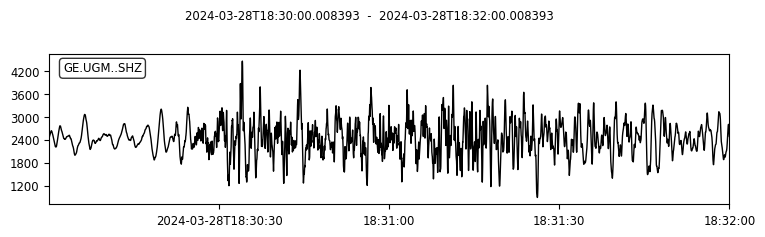

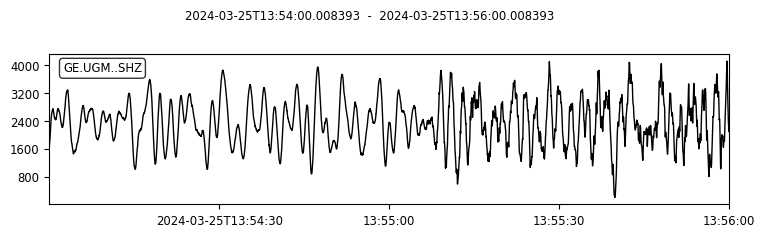

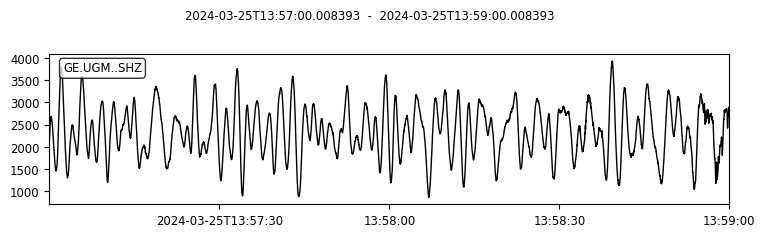

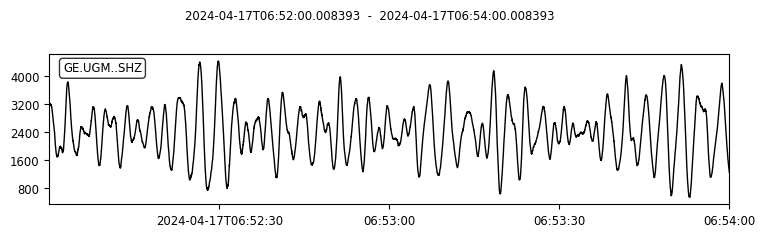

In [ ]:
list_ugm = make_trace_list('UGM', time)

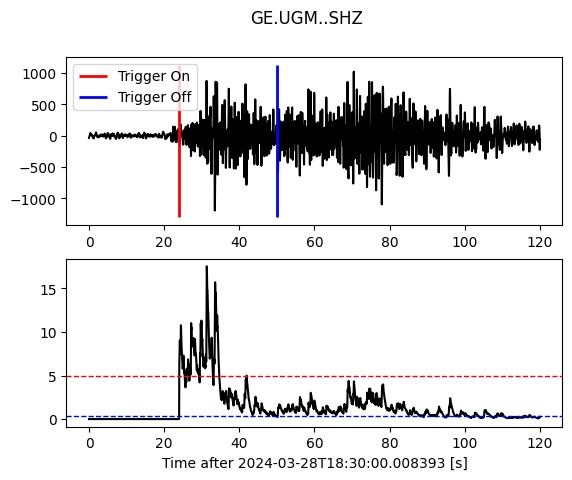

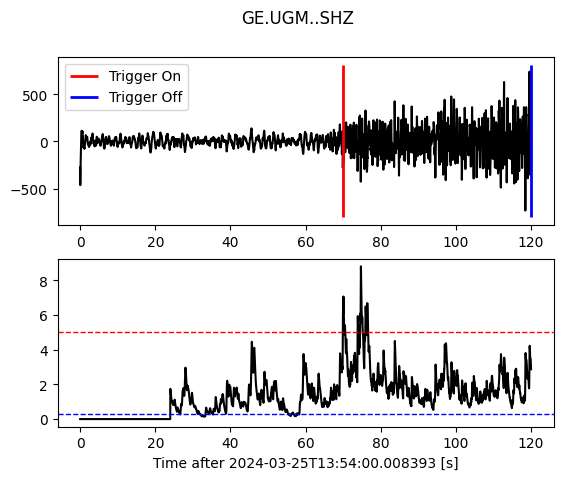

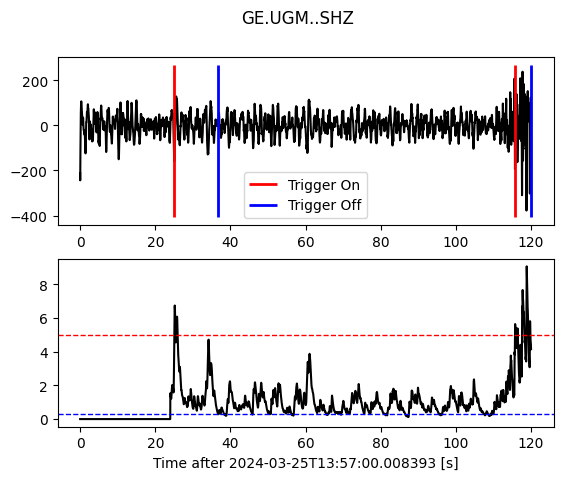

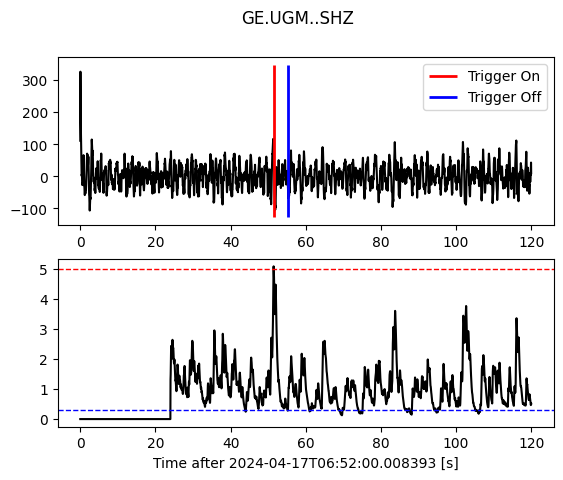

In [ ]:
plot_all_trace(list_ugm, 0.5, 24, 5, 0.3)

# BBJI

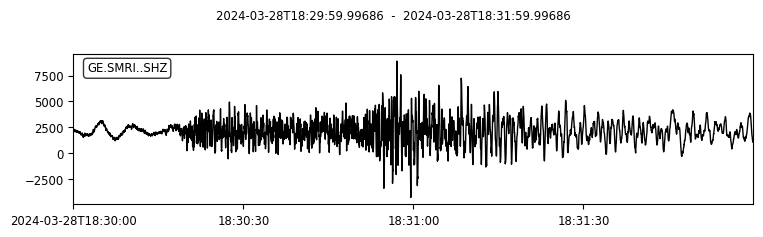

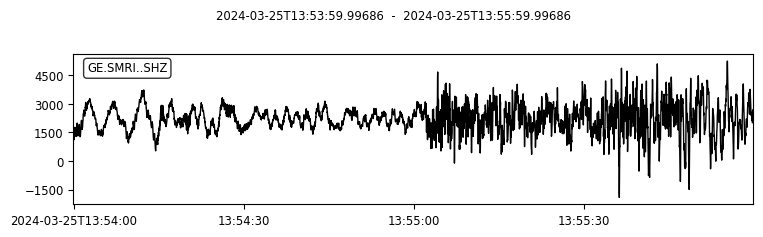

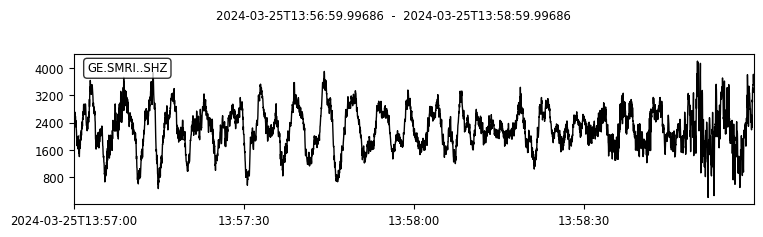

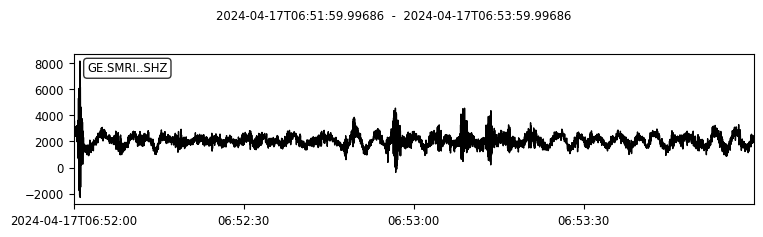

In [ ]:
list_smri = make_trace_list('SMRI', time)

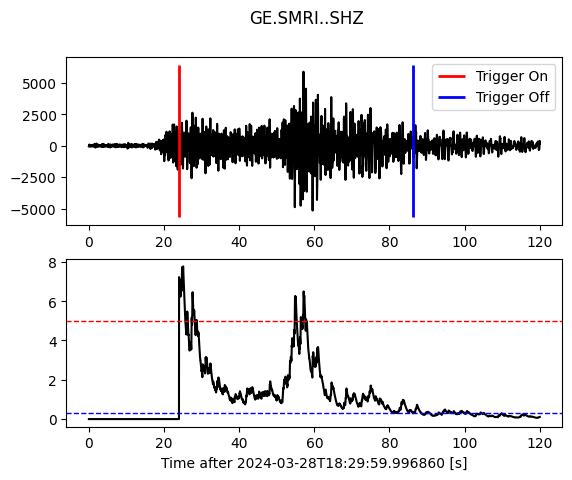

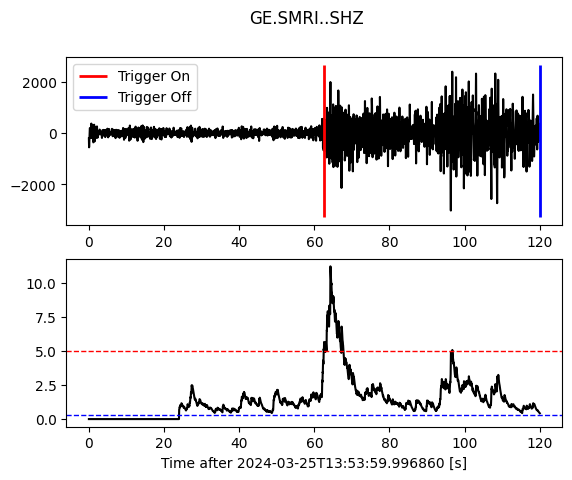

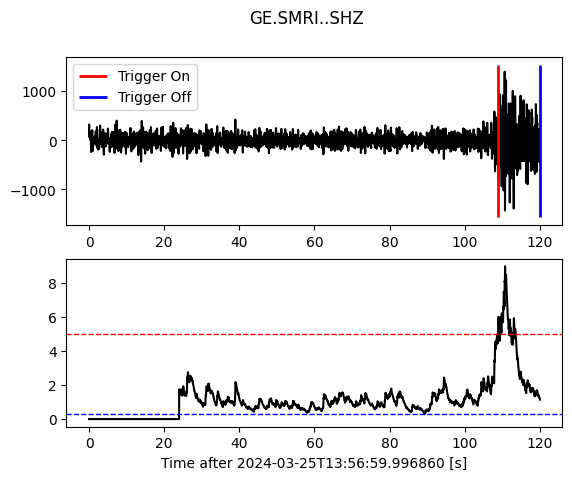

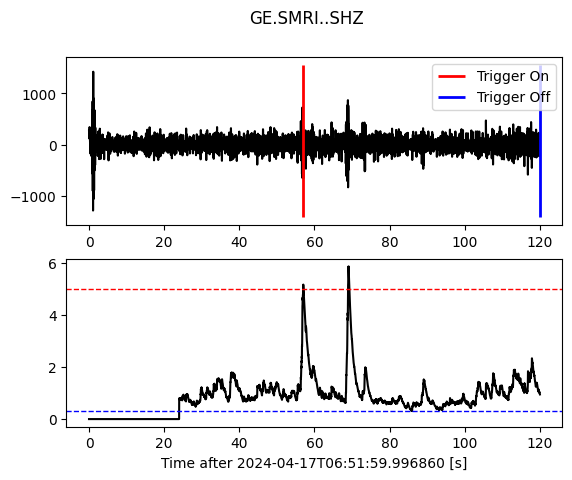

In [ ]:
plot_all_trace(list_smri, 1, 24, 5, 0.3)

# JAGI

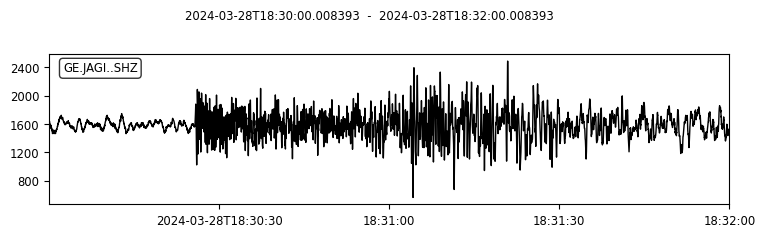

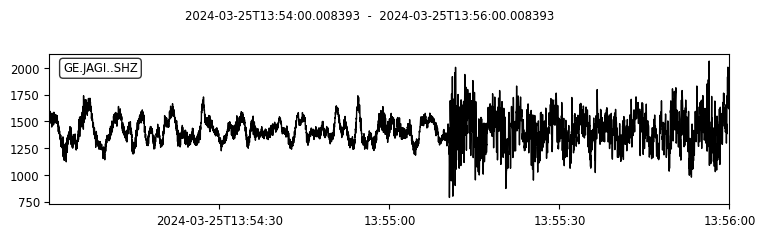

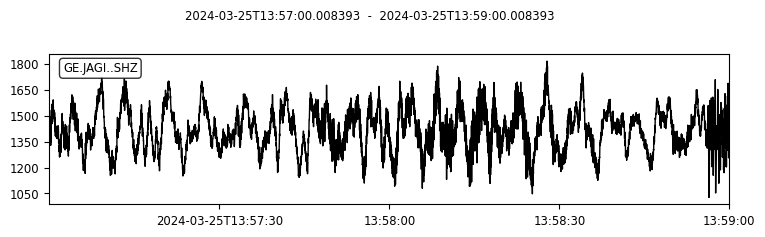

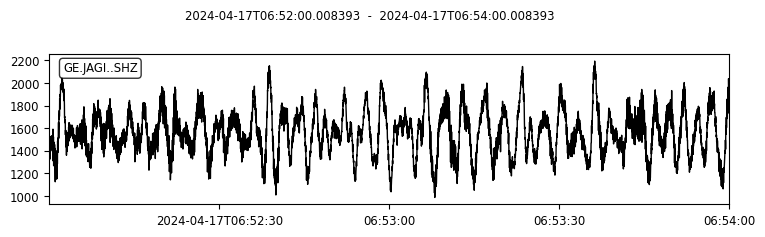

In [ ]:
list_jagi = make_trace_list('JAGI', time)

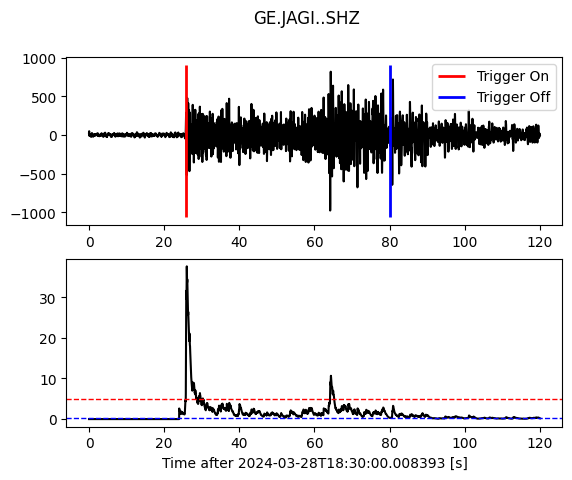

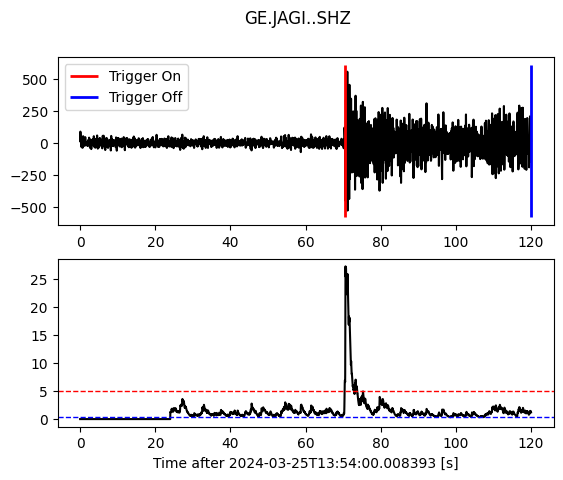

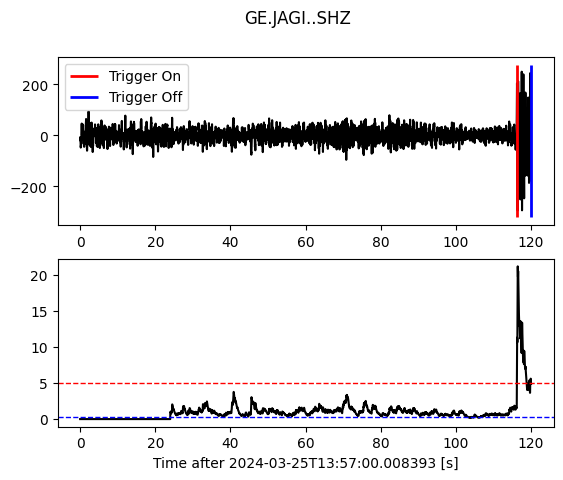

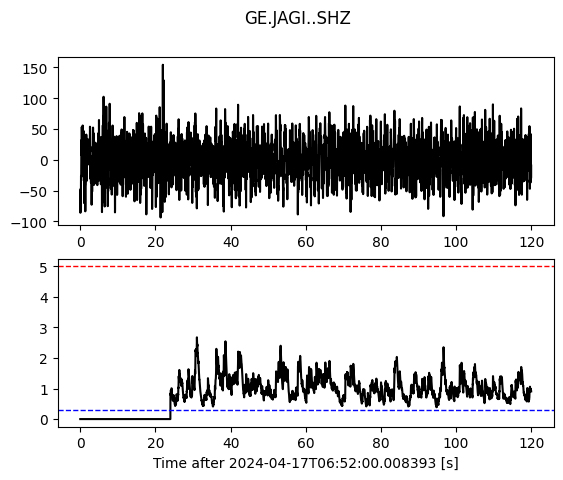

In [ ]:
plot_all_trace(list_jagi, 0.5, 24, 5, 0.3)

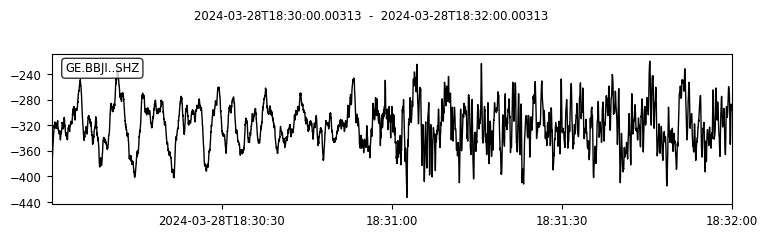

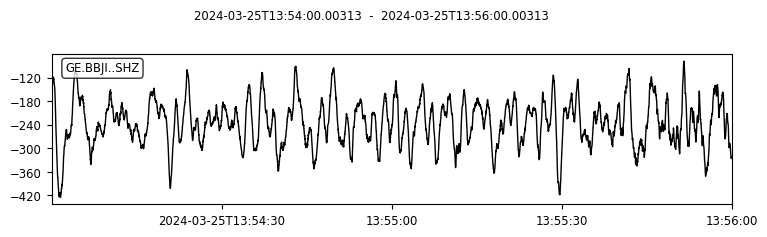

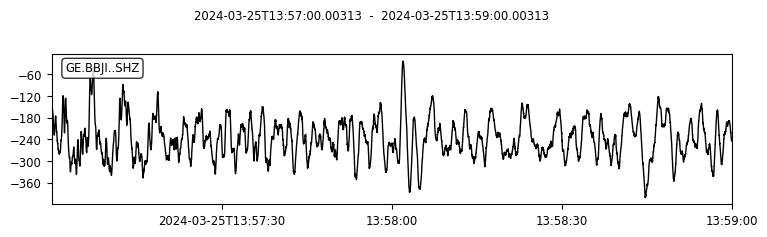

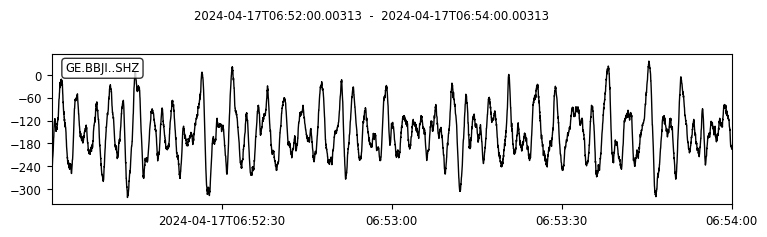

In [ ]:
list_bbji = make_trace_list('BBJI', time)

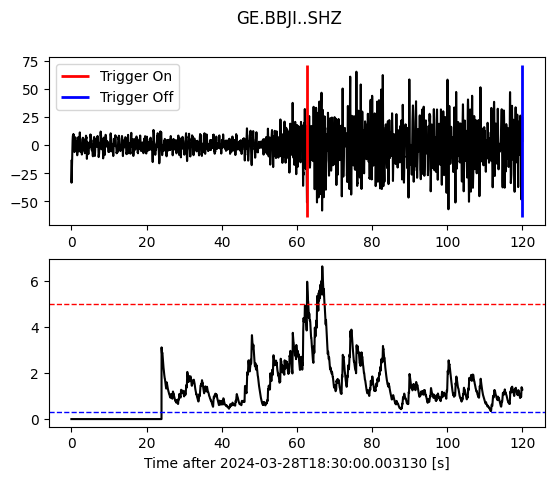

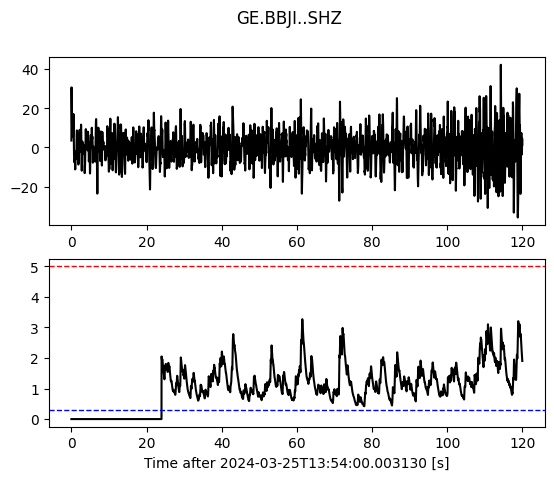

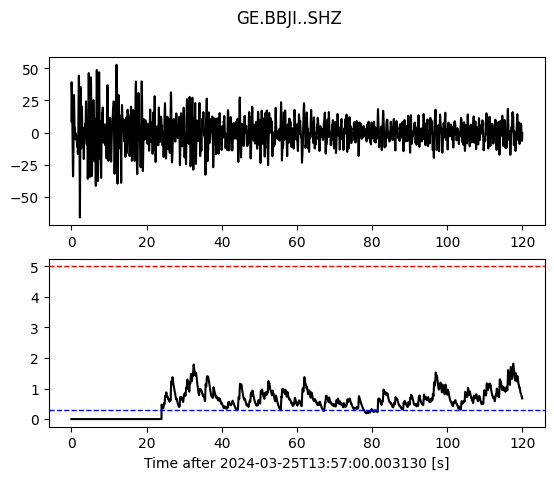

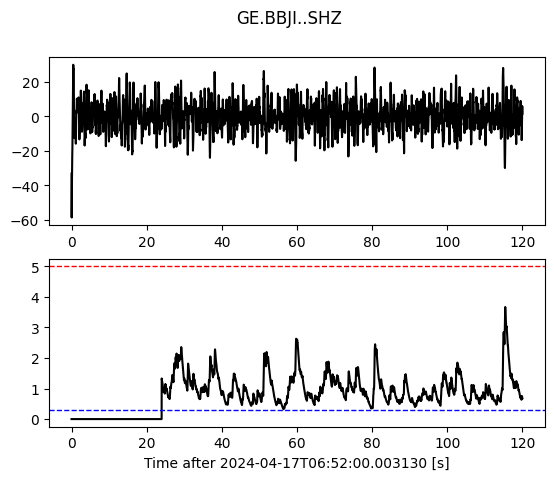

In [ ]:
plot_all_trace(list_bbji, 1, 24, 5, 0.3)